# The shape of RTs : Is it a log ? is it an exgaussian ? No it's a generative model

<img src="../resources/img/shape-of-rt.png">

__TL;DR (_or_ too long didn't read) summary__ : When using reaction times (RT) in cognitive sciences, usually the time from stimulation to the reaction/response of a participant, the first question often arising is, what is the distribution of that variable ? Now, some might be happy with a distribution that resembles the empirical one. But even then remains one crucial question. What do you then do with this distribution? 
In my opinion, asking yourself the question of RT distribution is a good way to ensure whether you are analyzing this measure appropriately (e.g. should I be confident in analyzing the mean RT given the shape of that distribution ?). But if you want to really engage in a description of RTs beyond the use of a biased parameter such as the mean, then you have no other choice left than to engage in the theory of how these RTs are generated.


# What is the question?
I have seen an increased interest in the question of what distribution fits reaction times ($RT$s) around me. And while for the researcher not specialized in mental chronometry that question might seem trivial, it actually sends you right to a really long, complex and unfinished journey. The main reason being that you cannot ask what distribution RTs have without also asking yourself what you are trying to measure and what your research question actually is about. (and actually, that reasoning should also come for other measures, but I leave that to others)

This post is intended to be a speeded walkthrough for these two questions applied to RTs. While it is impossible to give a complete description of the field of mental chronometry in one blog post, I wish that this might help scientists engaging in RT data analysis to have some representation and references on the theories behind RT analysis.

## What is the situation? 
In our statistical world we scientist want to summarize data in an efficient way to understand natural phenomenons.
To that end we rely on distributions where we seek to describe the data at hand with the associated parameters and then rely on these parameters to make inferences.


For example we want to know how much digits a participant can remember (and let's call that working memory). Imagine that this individual has a true working memory score but attentional fluctuations yields noise in the measurement. If we were to assume that this attentional fluctuation is distributed normally (participant is equally likely to deploy a low or high attention and most likely to deploy a mid-level attention) we could describe the $j$th sample of working memory score as drawn ($\sim$) from a normal distribution with an estimated mean ($\mu$) and a given standard deviation ($\sigma$) which we can write as follows :

$$
\text{WM}_j \sim \mathcal{N}(\mu, \sigma)
$$

Now if we wanted to know whether _e.g._ reading vs hearing the digits changed the working memory score, we could write it as follows : 

$$
\text{WM}_{hearing_j} \sim \mathcal{N}(\mu, \sigma)\\
\text{WM}_{reading_j} \sim \mathcal{N}(\mu + \beta, \sigma)
$$

We here model the working memory as normally distributed with mean $\mu$ for hearing and mean $\mu + \beta$ for reading as would be done using a linear model to test the hypothesis of a difference between both conditions ($H0 : \beta = 0$).

So long we have already made at least four assumptions :
1. the measure of retained digits is a good proxy for working memory
2. the data is normally distributed
3. $\mu$ is the best estimate of the participants true working memory score
4. $\sigma$ is unaffected by the modality (hearing _vs._ reading) factor

<sup> and 5. each trial is _independently and identically distributed_ (_e.g._ attention in trial $n$ does not predict attention in trial $n+1$)

    
None of these assumption is technical, __they are all theoretical__ as they relate to what you think of the generative model of the behavior.     
While in this fictive context of working memory these assumptions might be reasonable there are a lot of situation in cognitive science where those are far from being trivial, that is the case for RTs.
    
### The case of RTs
    
   For reaction time, the time happening between the onset of a stimulus and the recording of the response produced by the participant, these assumptions are hard to justify. Let's illustrate it by trying to answer these three questions :
1. What is the RT a measure of ?
2. What is the distribution of RTs ?
3. What is the parameter of that distribution that is relevant for the research question at hand ?

## 1. What is the RT a measure of ?

There are some situations where researchers in cognitive science are interested in the measure and not an instantiated process as in the WM example above. For example if you're a working on a plane cockpit and want to be sure that, _on average_ users will be faster to react given a certain design, then you will be interested in the mean RT _per se_. But often in cognitive science we use the measure of RTs as a proxy of some cognitive process. For example we could be interested in whether older people are slower to recognize a stimulus than younger participants. In this case, then mean RT might not be what we would like to infer on.

### RT as a composite measure

In order to react to a stimulus, as already discussed in the mid-19th century by von Helmholtz, you necessarily have different steps in the information processing chain.
Let's make this easy and assume that we have three stages in the RTs : encoding the stimulus, deciding/identifying the stimulus, executing the response.

<img src="../resources/img/paths.png" scale="20%">

Now each of these steps likely have different impact on the distribution of RT, _e.g._ delaying the response production by requiring responses with the foot rather than the hand changes the mean RT, however observing a slower mean RT for foot response does not mean that stimulus was identifed slower.

One way to decipher wether the step of interest was changed would be to have parameters of the distribution that could account for such steps ! What if we connect this with the question on the distribution of RTs ?

## 2. What is the distribution of RTs ?

It is sad to say but as pointed out by Noorani and Carpenter in 2013, RTs do not seem to obey any mathematical functions defining usual stochastic processes.

Lets take a look at the distribution of the RTs from a participant I tested during my PhD thesis (for the data see the [github repository](https://github.com/GWeindel/DecomposingRT))

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-ticks')

data = pd.read_csv('https://raw.githubusercontent.com/GWeindel/DecomposingRT/master/Raw_data/markers/MRK_SAT.csv')

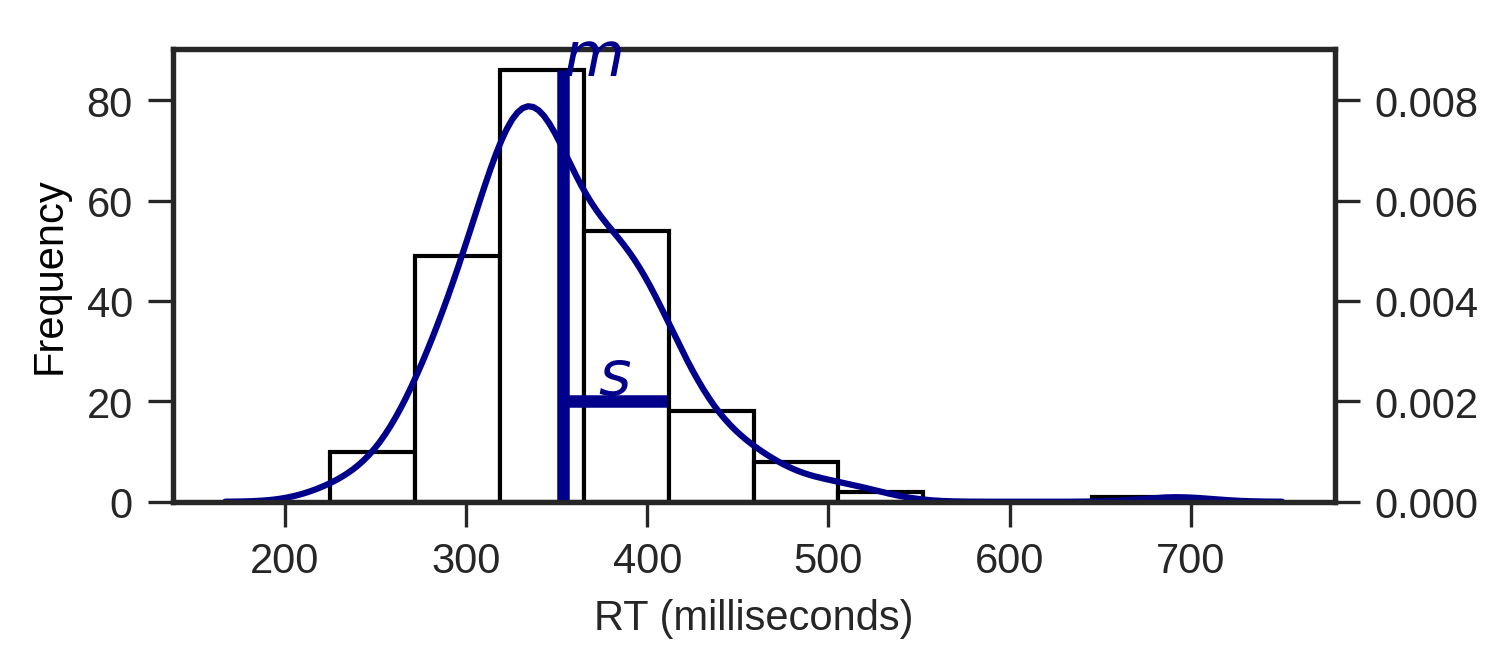

In [14]:
fig, ax1 = plt.subplots(dpi=300, figsize=(5,2))
dataS1 = data[(data.participant == "S1_1") & (data.condition == "Speed")]
subdat = dataS1[(dataS1.contraste == 0.3) & (dataS1.response == 1)]

ax2 = ax1.twinx()
ax1.hist(subdat.rt, bins=10, color="w", edgecolor='k') 
sns.kdeplot(subdat.rt, ax=ax2, color="darkblue")
ax2.vlines(subdat.rt.mean(), 0, 0.0086, lw=3,color='darkblue')
plt.hlines(0.002, subdat.rt.mean(),subdat.rt.mean()+subdat.rt.std(), lw=3, color='darkblue')
ax1.set_xlabel('RT (milliseconds)')
ax1.set_ylabel('Frequency', color='k')
ax2.set_ylabel('', color='darkblue')
ax2.annotate(r'$m$',
            xy=(subdat.rt.mean(), .0085), size=15, color='darkblue')

plt.annotate(r'$s$',
            xy=(subdat.rt.mean()+subdat.rt.std()/3, .00215), size=15, color='darkblue')
plt.savefig('RTdensity.png', bbox_inches='tight')
plt.show()


What we observe is two classical features that researchers measuring RTs usually observe : RT distributions are asymetric, with shorter RTs closer to the mean than slower RTs. Another feature is that the mean of RT often increases with the standard deviation (respectively $m$ and $s$ in panel a) as evident from panel b.

Both features are known and documented for almost a century already. The observation that mean increases with standard deviation has already been reported by Fessard, Fessard, Kowarski, Laugier, and Monnin in 1936. These two features jointly show both that __using a normal distribution to model individual RTs will not capture the data and that it is not appropriate to expect a change in the mean RT only__.

Now if the problem is only about the quality of the fit we could find a better alternative than a normal distribution.

###  A matter of goodness-of-fit 

The litterature on fitting different distribution to RTs is surprisingly large. The [post](https://lindeloev.github.io/shiny-rt/) by Jonas Kristoffer Lindeløv gives a nice (interactive) overview of different distributions applied to real observed $RT$s.

As can be seen on that post a lot of distributions can fit the RTs data sufficiently well but none will be a good fit for all tasks and participants except perhaps the ex-Gaussian that I am going to describe a bit deeper to illustrtate the problem of "atheoretical" distributions before moving to generative models.


#### The Ex-Gaussian
Back in the mid-20th century, Christie and Luce, assumed that the distribution of $RT$s could be accounted by the convolution of an exponential and a normal distribution (but ex-Gaussian sounds better than a normal ex I guess). Their intuition was that two separated processes were contributing to RTs, one which distribution is normal and one which distribution is exponential. This gives the following likelihood function : 

 \begin{equation}
     f{(x | \mu, \sigma, \tau)} = \frac{1}{\tau\sqrt{2\pi}}\exp{\frac{\sigma^2}{2\tau^2}-\frac{x - \mu}{\tau}} \cdot\int_{-\infty}^{[(x-\mu)/\sigma]-(\sigma/\tau)}\exp{-\frac{y^2}{2}dy}
     \label{exgauss}
 \end{equation}

This formula then describes RTs distribution based on three parameters $\mu$, $\sigma$ and $\tau$. All these parameters describe features of the data, see for example this figure from Matzke and Wagenmakers (2008) : 
<img src="../resources/img/exgauss.png" scale="20%">

Increasing $\mu$, the mean of the gaussian process, shifts the distribution, while increasing $\sigma$ increases the spread of RTs around $\mu$ and increasing $\tau$ increases the skew in the data. We therefore have a distribution geared to account for RTs and that is, in most cases, able to fit the data pretty well.


#### From parameters to processes
Now that we have suggested what RTs are measuring and choosen an appropriate distribution what do we do ?

_E.g._ What parameter will be changed by age ? $\mu$ ? $\sigma$ ? $\tau$ ?

Now this example illustrates the problem, while in the working memory example of the introduction the modeling of the effect on the mean was straigthforward it is no longer true for RTs. We could attribute explicitely a stage of RT to one parameter as Christie and Luce suggested initially. The authors thought that the exponential part of the distribution is linked to the decision time but other have quickly suggested that this part is linked to movement times (McGill, 1963). Since then no evidence has been found towards the correct interpretation of the parameters (see the paper by Matzke and Wagenmakers, 2008).

One answer could be "let's just look for the effect on each parameter", but then what do you publish as a result ?  Aging increases the $\tau$ of the RTs modeled with the ex-gaussian ? 


Now my take is the following : __if you already made the way of asking what distribution can fit RTs you cannot overlook the assumptions and questions raised by the choice of a distribution__

Therefore if the choice of a distribution is a theoretical choice I suggest that you should 

In [ ]:
sim = 1000
for(i in 1:sim){
    samples = 
}

In [13]:
lapply(rlnorm(100, 6, 1), mean(i) 1:sim(i))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:35: unexpected numeric constant
1: lapply(rlnorm(100, 6, 1), mean(i) 1
                                      ^


The distributions of $RT$s has generated a lot of theories early on. 

- The (shifted)log-normal

- The inverse-normal (Carpenter)

- The ex-Gaussian (because the ex-normal might not refer to what you intend)) 
is among the most "theory-free" distribution advocated. But interestingly NDT vs DT changed. 

- The shifted wald

- Process models


## It depends on the data and the question

### The data 

1 dimensional data : If the data are simple reaction time then
2 dimensional data : decision/conflict tasks

Short vs long RTs (Lerche)



### What is the question ?

- 

In [2]:
install.packages("rtdists")

also installing the dependencies ‘survival’, ‘expm’, ‘evd’, ‘msm’, ‘gsl’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



My take : 
- If the question is about an effect on a latent cognitive process there is no benefit from switching to a more appropriate law of distributions as long as we do not validate the link between parameter and cognitive process
- If the question is about the description of the RTs then we should stick with whatever describes RT best (e.g. exgaussian)
- 